# Model validation altimetry

Note: this notebook requires the model output data

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

In [1]:
import matplotlib.pyplot as plt
import modelskill as ms
import helper as h
import mikeio
import os
import matplotlib.pyplot as plt
import numpy as np

from watobs import DHIAltimetryRepository

import glob
from pathlib import Path
import warnings
import pandas as pd
import modelskill as ms

In [6]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
alt_fldr = "../observations/altimetry/"
mr_fn = f"{mr_fldr}Area.dfsu"

save_png = False if "sample" in mr_fldr else True

In [3]:

#api_key = os.environ['2f82b085-0431-45bb-8990-84568a095de7']
api_key = '2f82b085-0431-45bb-8990-84568a095de7'
repo = DHIAltimetryRepository(api_key)

### Satellite overview

In [12]:
repo.get_satellites()

,long_name
short_name,
gs,Geosat
e1,ERS-1
tx,TOPEX
pn,Poseidon
e2,ERS-2
g1,GFO
j1,Jason-1
n1,Envisat
j2,Jason-2


In [13]:
repo.get_observation_stats()

,min_date,max_date,count
short_name,,,
c2,2010-07-16 00:12:03.791794,2025-09-03 07:39:05.836279,299876463
n1,2002-05-14 18:32:32.755126,2012-04-08 10:54:23.635591,257633695
j1,2002-01-15 06:07:31.458256,2013-06-21 00:56:32.487362,224260075
sa,2013-03-14 05:39:27.811666,2025-09-03 07:37:37.905449,259791864
6a,2020-11-30 14:26:01.000000,2025-09-03 02:06:33.000000,108418705
j2,2008-07-04 12:19:19.570865,2019-10-01 08:04:57.954027,225297275
pn,1992-10-01 16:45:03.540531,2002-07-12 14:28:19.397424,15720144
gs,1985-03-31 00:00:00.861264,1989-12-30 14:57:52.901281,75115692
j3,2016-02-12 01:11:09.095919,2025-09-03 19:19:36.000000,200789558


c:\Users\muje\Projects\WaterBench-MIKE21SW-SouthernNorthSea\.venv\Lib\site-packages\watobs\altimetry.py:371: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  yearly = pd.date_range(start="1984-1-1", end="2026-1-1", freq="2AS")


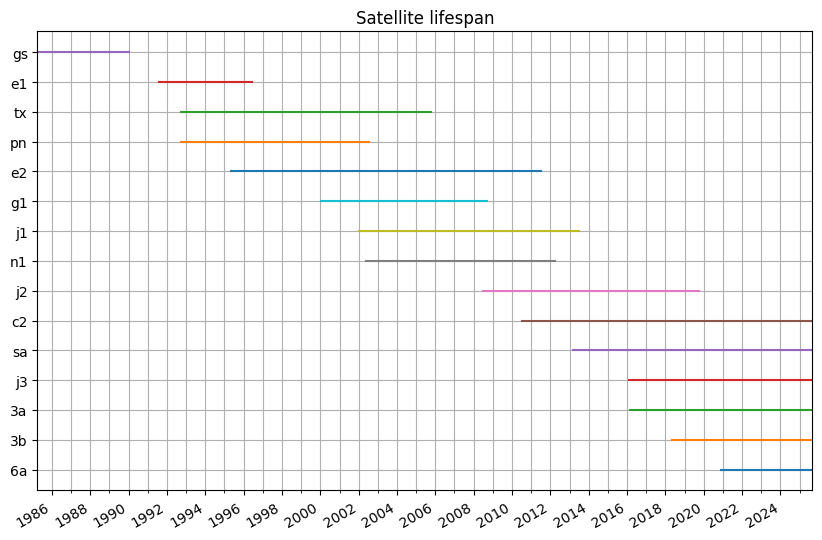

In [14]:
repo.plot_observation_stats();

### Spatial coverage

In [24]:
area = "bbox=-2,49.5,9,56"
gdf = repo.get_spatial_coverage(area, start_time="2021")

<Axes: >

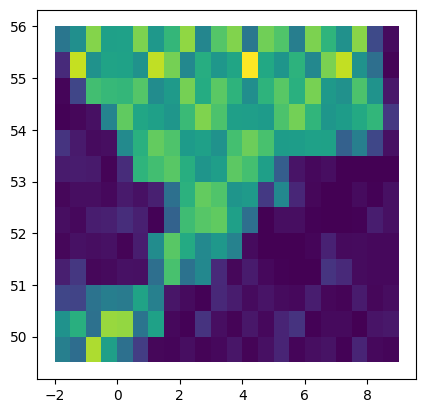

In [25]:
gdf.plot('count')

In [26]:
# Download coastline and countries from public source
import geopandas
coastline = geopandas.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_coastline.geojson")
countries = geopandas.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

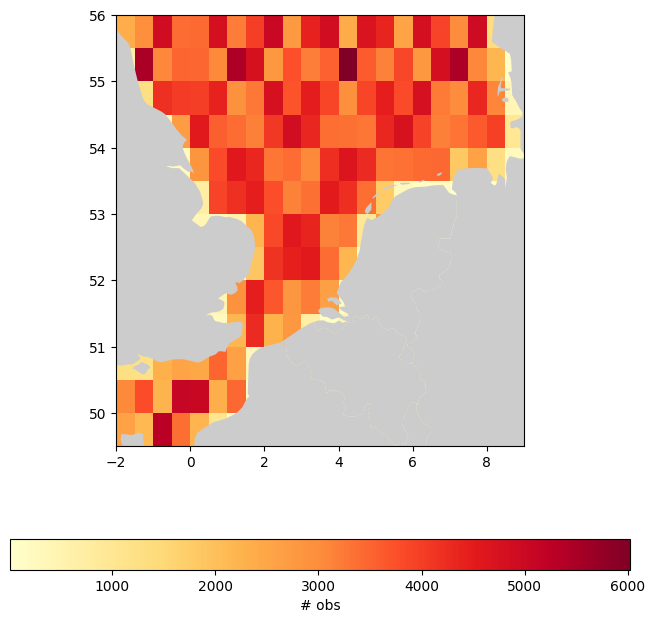

In [27]:
ax = gdf.plot('count', legend=True, figsize=(8,8), legend_kwds={'label': "# obs", 'orientation': "horizontal"}, cmap='YlOrRd')
countries.plot(ax=ax, color='0.8')
ax.set_xlim((-2,9))
ax.set_ylim((49.5,56))
ax.set_aspect(1.0 / np.cos(np.pi * 56 / 180))

### Download the data

In [87]:
data = repo.get_altimetry_data(area="lon=3&lat=53&radius=400", start_time="2022-01-01", end_time="2022-12-31")
data.df.head()

Succesfully retrieved 119191 records from API in 6.81 seconds


,longitude,latitude,water_level,significant_wave_height,wind_speed,distance_from_land,water_depth,satellite,quality,absolute_dynamic_topography,water_level_rms,significant_wave_height_raw,significant_wave_height_rms,wind_speed_raw,wind_speed_rads,quality_swh,quality_water_level,quality_wind_speed
datetime,,,,,,,,,,,,,,,,,,
2022-01-01 04:49:18.909,5.917604,49.946692,NaN,21.179,5.568,0.0,480.75,sa,2,NaN,NaN,21.378,30.850,5.621,5.11,2,2,2
2022-01-01 04:49:24.105,5.784601,50.248419,NaN,6.978,0.763,0.0,563.07,sa,2,NaN,NaN,7.006,6.965,1.075,1.06,2,2,2
2022-01-01 04:50:07.682,4.610102,52.773956,0.383,1.185,4.863,3209.0,-12.00,sa,2,0.096,0.031,1.143,0.335,4.954,4.53,2,2,2
2022-01-01 04:50:08.723,4.580665,52.834149,0.461,0.975,6.724,7356.0,-16.04,sa,1,0.091,0.041,0.931,0.303,6.715,6.17,1,1,1
2022-01-01 04:50:09.763,4.551158,52.894336,0.512,1.090,6.848,10841.0,-20.03,sa,1,0.064,0.039,1.047,0.291,6.832,6.29,1,1,1


In [88]:
data.query_params

{'lon': '3',
 'lat': '53',
 'radius': '400',
 'start_date': '20220101',
 'end_date': '20221231'}

In [89]:
data.df.head()

,longitude,latitude,water_level,significant_wave_height,wind_speed,distance_from_land,water_depth,satellite,quality,absolute_dynamic_topography,water_level_rms,significant_wave_height_raw,significant_wave_height_rms,wind_speed_raw,wind_speed_rads,quality_swh,quality_water_level,quality_wind_speed
datetime,,,,,,,,,,,,,,,,,,
2022-01-01 04:49:18.909,5.917604,49.946692,NaN,21.179,5.568,0.0,480.75,sa,2,NaN,NaN,21.378,30.850,5.621,5.11,2,2,2
2022-01-01 04:49:24.105,5.784601,50.248419,NaN,6.978,0.763,0.0,563.07,sa,2,NaN,NaN,7.006,6.965,1.075,1.06,2,2,2
2022-01-01 04:50:07.682,4.610102,52.773956,0.383,1.185,4.863,3209.0,-12.00,sa,2,0.096,0.031,1.143,0.335,4.954,4.53,2,2,2
2022-01-01 04:50:08.723,4.580665,52.834149,0.461,0.975,6.724,7356.0,-16.04,sa,1,0.091,0.041,0.931,0.303,6.715,6.17,1,1,1
2022-01-01 04:50:09.763,4.551158,52.894336,0.512,1.090,6.848,10841.0,-20.03,sa,1,0.064,0.039,1.047,0.291,6.832,6.29,1,1,1


### Quality flag

Each data point has a quality flag:

0. Good
1. Acceptable
2. Bad

Let's keep only the good data.

In [90]:
data.df = data.df[data.df.quality==0]

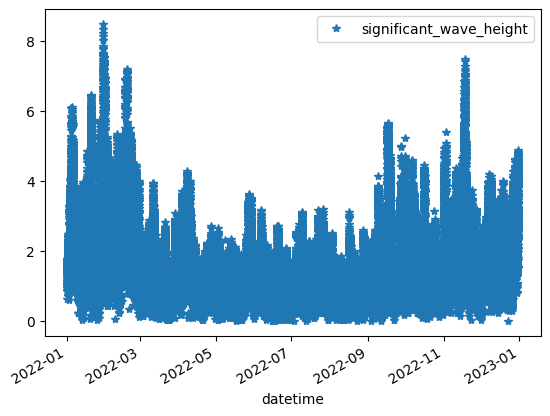

In [91]:
data.df[['significant_wave_height']].plot(style="*");

### Plot data

In [101]:
data_subset = repo.get_altimetry_data(area="lon=3&lat=53&radius=400", start_time="2022-01-01", end_time="2022-01-21")

Succesfully retrieved 6710 records from API in 1.03 seconds


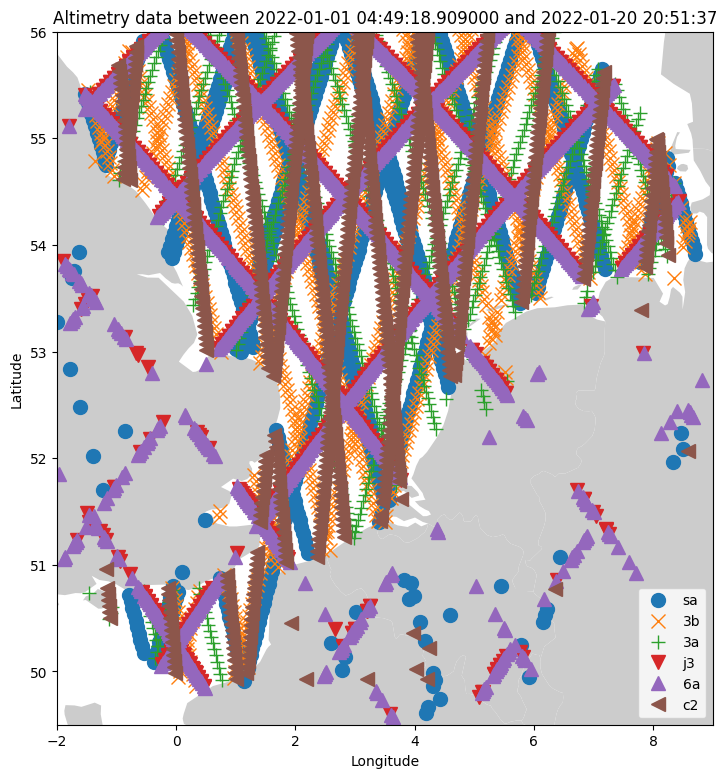

In [102]:
data_subset.plot_map()
ax = plt.gca()
countries.plot(ax=ax, color='0.8')
ax.set_xlim((-2,9))
ax.set_ylim((49.5,56))
ax.set_aspect(1.0 / np.cos(np.pi * 56 / 180))

### Create csv files

In [93]:
# Select only the desired columns
df_filt = data.df[["longitude", "latitude", "significant_wave_height", "quality_swh", "satellite"]]
df_filt.head()

,longitude,latitude,significant_wave_height,quality_swh,satellite
datetime,,,,,
2022-01-01 04:50:12.885,4.462218,53.074862,1.023,0,sa
2022-01-01 04:50:13.926,4.432431,53.135026,1.284,0,sa
2022-01-01 04:50:14.967,4.402572,53.195183,1.311,0,sa
2022-01-01 04:50:16.007,4.372642,53.255334,1.278,0,sa
2022-01-01 04:50:17.048,4.342640,53.315478,1.316,0,sa


In [107]:
# Make a dataframe for each satellite
satellite_list = ["3a", "3b", "6a", "c2", "j3", "sa"]

# Output folder
alt_fldr = "../observations/altimetry/"
if not os.path.exists(alt_fldr):
    os.makedirs(alt_fldr)

# Loop through satellites
for sat in satellite_list:
    df_sat = df_filt[df_filt["satellite"] == sat]
    # Drop satellite column
    df_sat = df_sat.drop(columns=["satellite"])
    # Keep only good quality data
    df_sat = df_sat[df_sat["quality_swh"]==0]
    # Drop quality column
    df_sat = df_sat.drop(columns=["quality_swh"])

    # Save to CSV
    df_sat.to_csv(f"{alt_fldr}altimetry_{sat}.csv")


### Get altimetry obs

In [7]:
def get_altimetry_obs(alt_fldr):
    """Get altimetry observations as list of TrackObservation objects"""
    sat_files = sorted(glob.glob(alt_fldr + "Altimetry_*.csv"))
    missions = [f.split("_")[1].split(".")[0] for f in sat_files] # get satellite names from filenames
    q = ms.Quantity(name="Significant Wave Height", unit="meter")
    altlist = []
    for m in missions:
        df = pd.read_csv(alt_fldr + f"Altimetry_{m}.csv", index_col=0)
        df.index = pd.to_datetime(df.index, format="ISO8601")
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", message=".*duplicate timestamps.*")
            # Create TrackObservation object
            o = ms.TrackObservation(df, item="significant_wave_height", x_item="longitude", y_item="latitude", name=m, quantity=q)
        altlist.append(o)
    return altlist


In [8]:
altlist = get_altimetry_obs(alt_fldr=alt_fldr)
altlist

[<TrackObservation>: 3a
 Time: 2022-01-01 10:56:44 - 2022-12-30 10:46:52
 Quantity: Significant Wave Height [meter],
 <TrackObservation>: 3b
 Time: 2022-01-01 10:17:30 - 2022-12-29 10:33:45
 Quantity: Significant Wave Height [meter],
 <TrackObservation>: 6a
 Time: 2022-01-01 20:26:32 - 2022-12-30 12:05:31
 Quantity: Significant Wave Height [meter],
 <TrackObservation>: c2
 Time: 2022-01-01 21:43:30.480000 - 2022-12-30 14:48:19.768000
 Quantity: Significant Wave Height [meter],
 <TrackObservation>: j3
 Time: 2022-01-01 20:26:03.960000 - 2022-12-30 18:50:34.393000
 Quantity: Significant Wave Height [meter],
 <TrackObservation>: sa
 Time: 2022-01-01 04:50:12.885000 - 2022-12-29 18:30:59.002000
 Quantity: Significant Wave Height [meter]]

### Model validation

In [9]:
mr = ms.DfsuModelResult(mikeio.read(mr_fn,time=slice("2022-01-03","2022-12-31"))[0], name="MIKE21")
mr

<DfsuModelResult>: MIKE21
Time: 2022-01-03 00:00:00 - 2022-12-31 23:00:00
Quantity: Significant wave height [m]

In [10]:
cmps = []
match_t = "2022" # You can choose a specific time period here
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time=match_t), mod=mr) 
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 3a...
Processing 3b...
Processing 6a...
Processing c2...
Processing j3...
Processing sa...


In [11]:
cc.skill().round(4)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,13803,-0.0,0.3012,0.3012,0.2294,0.9654,0.1979,0.9091
3b,14465,0.0,0.3324,0.3324,0.2459,0.9498,0.2279,0.8771
6a,18315,-0.0,0.2857,0.2857,0.2170,0.9611,0.1957,0.9094
c2,13542,0.0,0.3171,0.3171,0.2422,0.9616,0.2078,0.8869
j3,16264,0.0,0.3085,0.3085,0.2364,0.9568,0.1988,0.8964
sa,12533,-0.0,0.2989,0.2989,0.2218,0.9679,0.1936,0.9066


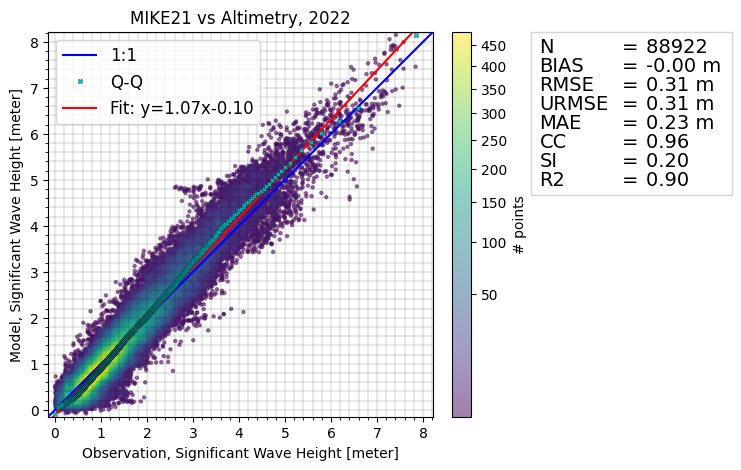

In [12]:
cc.plot.scatter(skill_table=True, show_points=True, figsize=(6,5))
plt.title("MIKE21 vs Altimetry, "+match_t)
if save_png: 
    plt.savefig("../figures/altimetry_comparison.png", bbox_inches="tight")

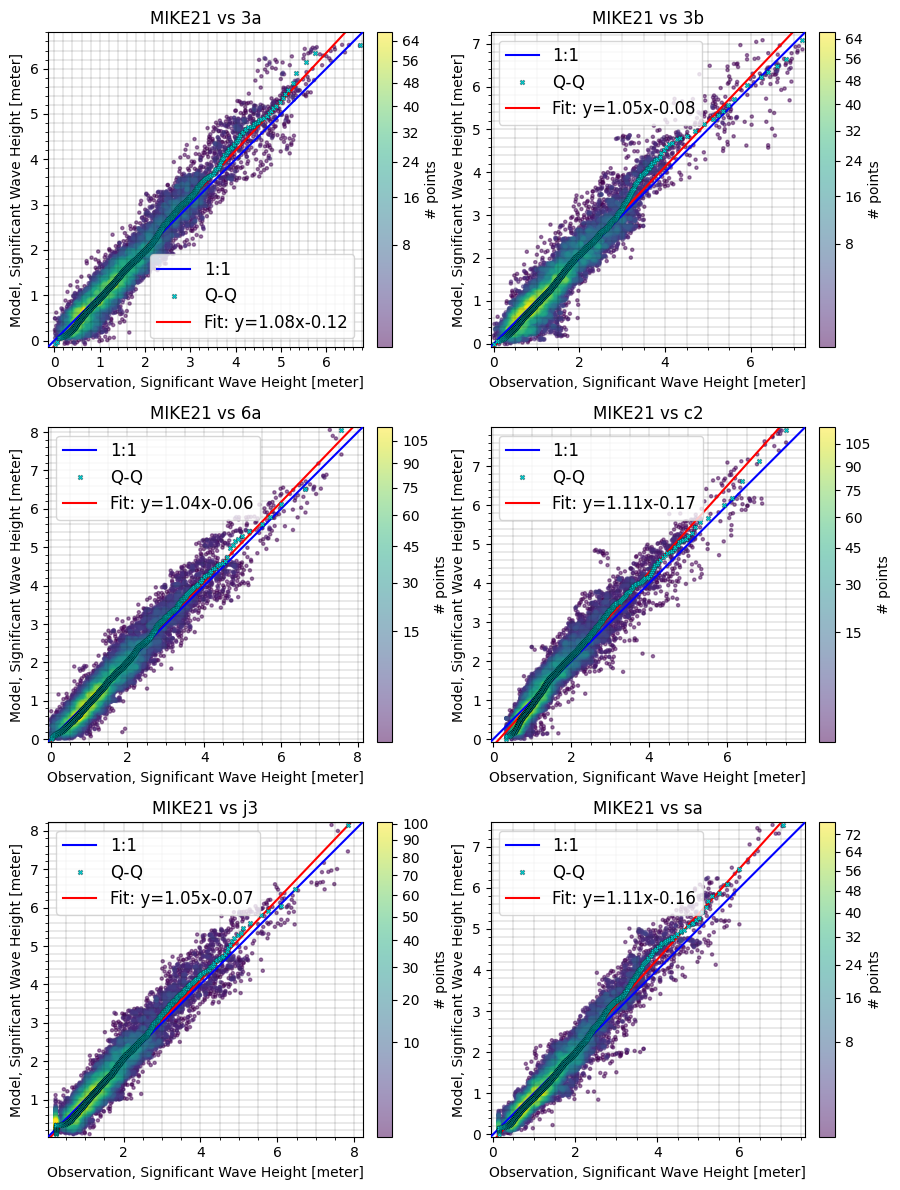

In [13]:
fig, axs = plt.subplots(-(-len(cc)//2), 2, figsize=(9,len(cc)*2))
axs = axs.flatten()
for i in range(len(cc)):
    cc[i].sel().plot.scatter(ax=axs[i], show_points=True)

if len(cc) % 2 != 0:
    axs[-1].axis("off")
plt.tight_layout()
plt.show()